In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import math
import sys
import sympy

In [ ]:
X, Y = sympy.symbols("x,y")

In [ ]:
def show(x, y, desc=""):
  plt.plot(x,y,'o')
  plt.xlabel("Value of x")
  plt.ylabel("Value of y")
  plt.title(desc)
  plt.show()


# Методом мод. Эйлера
def euler_modified(eq, a, b, x0, y0, h):
    n = int(math.ceil((b - a) / h))
    equation = str(eq)
    result: list[(float, float)] = [(x0, y0)]

    for i in range(n+1):
        xi = float(result[i][0])
        yi = float(result[i][1])
        xi1 = float(xi + h)
        f1 = get_val(equation, xi, yi)
        f2 = get_val(equation, xi1, yi + h * f1)
        yi1 = float(yi + h / 2 * (f1 + f2))
        result.append((xi1, yi1))
    return result


# Методом Мильна
def milne(eq, a, b, x0, y0, h, eps):
    n: int = math.ceil((b - a) / h)
    result, _, _ = runge_rule(eq, a, b, x0, y0, h, eps)
    plotX = []
    plotYMilne = []
    for i in range(3, n+1):
        xi = result[i][0]
        xi1 = xi + h
        y3 = float(result[i - 3][1])
        f2 = float(get_val(eq, result[i - 2][0], result[i - 2][1]))
        f1 = get_val(eq, result[i - 1][0], result[i - 1][1])
        fi = get_val(eq, result[i][0], result[i][1])
        y_cur = float(y3 + 4 * h / 3 * (2 * f2 - f1 + 2 * fi))
        yi1 = float(result[i - 1][1])
        fi1r = float(get_val(eq, xi1, y_cur))
        y_prev = float(yi1 + h / 3 * (f1 + 4 * fi + fi1r))
        while abs(y_prev - y_cur) > eps:
            y_cur = y_prev
            fi1r = get_val(eq, xi1, y_cur)
            y_prev = yi1 + h / 3 * (f1 + 4 * fi + fi1r)
        result.append((xi1, y_prev))
    return result

def runge_rule(eq, a, b, x0, y0, h, eps):
    eps_cur = eps
    h_cur = h
    res = euler_modified(eq, a, b, x0, y0, h)
    r = 10000
    while r >= eps_cur:
        prev_res = res
        h /= 2
        res = euler_modified(eq, a, b, x0, y0, h)
        r = abs(res[0][1] - prev_res[0][1]) / 3
        for i in range(len(res[::2])):
            r = max(r, abs(res[::2][i][1] - prev_res[i][1]) / 3)

    result = [i for i in res[::int(h_cur / h)]]
    h, h_cur = h_cur, h
    return result, r, h_cur

def estimate(y_arr, y_arr2, p):
    print("Оценка погрешности:")
    print(runge_rule(y_arr, y_arr2, p))

# Преобразуем величины в sympy объект
def get_val(equation: str, x: float, y: float):
    return float(sympy.sympify(equation).evalf(subs={X: x, Y: y}))

def resize(array, new_size, new_value=0):
    """Resize to biggest or lesser size."""
    element_size = len(array[0]) #Quantity of new elements equals to quantity of first element
    if new_size > len(array):
        new_size = new_size - 1
        while len(array)<=new_size:
            n = tuple(new_value for i in range(element_size))
            array.append(n)
    else:
        array = array[:new_size]
    return array

In [ ]:
def run():
  print("Ур-ие:")
  while True:
    try:
      equation: str = input("y(x)' = ")
      get_val(equation, 1, 1)
      break
    except (TypeError):
      print("Введите снова!", file=sys.stderr)
  eq = equation
  print("Интервал дифференцирования (a и b):")
  while True:
    try:
      a, b = map(float, input().strip().split(" "))
      break
    except ValueError:
      print("Попробуйте еще раз!", file=sys.stderr)
  if a > b:
    a, b = b, a
  x0, a1, b1 = a, a, b
  while True:
    try:
      print("Введите y0:")
      print(f"y({x0}) = ")
      a = float(input().strip())
      break
    except ValueError:
      print("Попробуйте еще раз!", file=sys.stderr)
  y0 = a
  while True:
    try:
      print("Введите h:")
      print(f"h = ")
      a = float(input().strip())
      break
    except ValueError:
      print("Попробуйте еще раз!", file=sys.stderr)
  h = a
  while True:
    try:
      print("Введите eps:")
      print(f"eps = ")
      a = float(input().strip())
      break
    except ValueError:
      print("Попробуйте еще раз!", file=sys.stderr)
  eps = a
  n: int = math.ceil((b1 - a1) / h)
  print(n)
  euler_result, _, _ = runge_rule(eq, a1, b1, x0, y0, h, eps)
  milne_result = milne(eq, a1, b1, x0, y0, h, eps)
  euler_result = euler_result[:n+1]
  milne_result = milne_result[:n+1]
  print(euler_result)
  print(milne_result)
  plotX = []
  plotYEuler = []
  plotYMilne = []
  for index, tuple in enumerate(euler_result):
    plotX.append(tuple[0])
    plotYEuler.append(tuple[1])
  for index, tuple in enumerate(milne_result):
    plotYMilne.append(tuple[1])
  plt.figure()
  plt.plot(plotX, plotYEuler, label="Мод. метод Эйлера")
  plt.plot(plotX, plotYMilne, label="Метод Милна")
  plt.grid(True)
  plt.legend()
  plt.show()
  # out1 = 0
  # out2 = 0
  # step = h
  # while 1:
  #   euler_result = euler_modified(eq, a, b, x0, y0, step)
  #   euler_result_2 = euler_modified(eq, a, b, x0, y0, step/2)
  #   if(runge_rule(euler_result[0], euler_result_2[0], 3)<=eps):
  #     out1 = euler_result_2
  #     estimate(euler_result[0], euler_result_2[0], 3)
  #     break
  #   step = step/2
  # euler_results = out1
  # print(euler_results)
  # while 1:
  #   milne_result = milne(eq, a, b, x0, y0, step, eps)
  #   milne_result_2 = milne(eq, a, b, x0, y0, step/2, eps)
  #   if(runge_rule(milne_result[0], milne_result_2[0], 3)<=eps):
  #     out2 = milne_result_2
  #     estimate(milne_result[0], milne_result_2[0], 3)
  #     break
  #   step = step/2
  # milne_results = out2
  # print(milne_results)
  # while 1:
  #   euler_result = euler_modified(eq, a, b, x0, y0, h)
  #   euler_result_2 = euler_modified(eq, a, b, x0, y0, h/2)
  #   if(runge_rule(euler_result[0][1], euler_result_2[0][1], 3)<=eps):
  #     break
  #   step = step/2
  # show(x_euler, y_euler_2, py_euler, "Approximation Solution with Modified Euler's Method",5)
  # estimate(y_euler, y_euler_2, 3)
  # print("Метод Мильна")
  # step = 1
  # while 1:
  #   if(runge_rule(y_milne, y_milne_2, 3)<=0.001):
  #     break
  #   step = step/2
  # show(x_milne, y_milne, py_milne, "Approximation Solution with Milne's Method",5)
  # estimate(y_milne, y_milne_2, 3)

Ур-ие:
y(x)' = y+(1+x)*y^2
Интервал дифференцирования (a и b):
1. 2.5
Введите y0:
y(1.0) = 
-1
Введите h:
h = 
0.1
Введите eps:
eps = 
0.000001
15
[(1.0, -1.0), (1.0999999999999943, -0.9090910881323658), (1.1999999999999886, -0.8333336009569484), (1.299999999999983, -0.7692310747861445), (1.3999999999999773, -0.7142860292711583), (1.4999999999999716, -0.6666669752307273), (1.599999999999966, -0.6250002936487665), (1.6999999999999602, -0.588235568680403), (1.7999999999999545, -0.555555809405504), (1.8999999999999488, -0.5263160224665366), (1.9999999999999432, -0.5000002128331551), (2.0999999999999375, -0.476190670013553), (2.199999999999932, -0.45454563072347187), (2.299999999999926, -0.4347827686660726), (2.3999999999999204, -0.41666681185466603), (2.4999999999999147, -0.4000001317700327)]
[(1.0, -1.0), (1.0999999999999943, -0.9090910881323658), (1.1999999999999886, -0.8333336009569484), (1.299999999999983, -0.7692310747861445), (1.3999999999999773, -0.7142860292711583), (1.49999999999

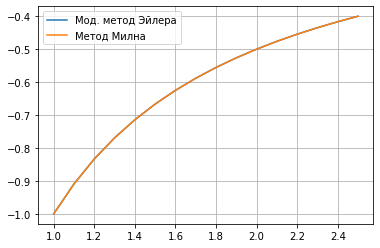

In [ ]:
run()